# My Capstone Project for Data Science and Machine Learning

## 1. Initial Problem and Overview

Let's imagine the city council wants to create an advertising campaign to rise awareness among the car drivers in the city and to reduce car accident fatality. For this porpuse, we use the given sample database. The goal is to study which are the conditions that rise the accident probability and which are the factors that provoke fatality. After this work, we should be able to predict the conditions that lead to accidents. 

In this way, the city council should be able to make an advertisement campaign in order to make the drivers aware of the danger in the most critical moments. 

## 2. Our available data

The available data is in the CSV file provided. It has dimensions of 194673 rows x 39 columns. The first step is to remove the useless information of the table in order to be able to handle the data with ease. We can remove the useless columns, but in this case it's easier to just select the useful ones and create a new dataframe with them. 

The chosen columns are: 'SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','ROADCOND','LIGHTCOND','WEATHER'. Let's keep it simple; this amount of information is enough for solving our problem. 
For example, the factors of the accident can be the weather conditions ('WEATHER'), the light conditions ('LIGHTCOND'), or the road condition ('ROADCOND'). The target variable is the severity of the accident ('SEVERITYCODE')

Now it's time to get started.



## 3. Cleaning data

For this step, we'll just try to remove the rows that have missing values and see if we do not miss much information by doing that. 
Then, we can just normalise and transform the data in order to be able to work with all columns in a mathematical way. 
We just finished the first step of the project. Now our data is preprocessed. 


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

In [5]:
idf=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv',low_memory=False)

In [6]:
df=idf[['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','ROADCOND','LIGHTCOND','WEATHER']]
df=df.dropna()
df.head() #This is de DF we are working with

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND,WEATHER
0,2,2,0,0,2,Wet,Daylight,Overcast
1,1,2,0,0,2,Wet,Dark - Street Lights On,Raining
2,1,4,0,0,3,Dry,Daylight,Overcast
3,1,3,0,0,3,Dry,Daylight,Clear
4,2,2,0,0,2,Wet,Daylight,Raining





## Now we need to transform the categorical variables into numerical ones

### Let's do it

In [7]:
df['LIGHTCOND'].replace(to_replace=['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'], value=[0,1,2,3,4,5,6,7,8],inplace=True)
df['WEATHER'].replace(to_replace=['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
df['ROADCOND'].replace(to_replace=['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'], value=[0,1,2,3,4,5,6,7,8],inplace=True)
df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND,WEATHER
0,2,2,0,0,2,1,0,2
1,1,2,0,0,2,1,1,1
2,1,4,0,0,3,0,0,2
3,1,3,0,0,3,0,0,0
4,2,2,0,0,2,1,0,1


In [8]:
X = np.asarray(df[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','ROADCOND','LIGHTCOND','WEATHER']])
X[0:5]


array([[2, 0, 0, 2, 1, 0, 2],
       [2, 0, 0, 2, 1, 1, 1],
       [4, 0, 0, 3, 0, 0, 2],
       [3, 0, 0, 3, 0, 0, 0],
       [2, 0, 0, 2, 1, 0, 1]])

In [9]:
y = np.asarray(df['SEVERITYCODE'])
y [0:5]

array([2, 1, 1, 1, 2])

In [10]:
#Normalizing dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.33905581, -0.18992511, -0.17186752,  0.05306845,  0.70875343,
        -0.59511457,  1.10587178],
       [-0.33905581, -0.18992511, -0.17186752,  0.05306845,  0.70875343,
         0.34710496,  0.20504641],
       [ 1.13648946, -0.18992511, -0.17186752,  1.8466818 , -0.60855849,
        -0.59511457,  1.10587178],
       [ 0.39871683, -0.18992511, -0.17186752,  1.8466818 , -0.60855849,
        -0.59511457, -0.69577897],
       [-0.33905581, -0.18992511, -0.17186752,  0.05306845,  0.70875343,
        -0.59511457,  0.20504641]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (151469, 7) (151469,)
Test set: (37868, 7) (37868,)


### Now we do have 2 sets, the train set and the test set

In [12]:
# NOW WE BUILD A RERESSION MODEL
LR = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.1, solver='liblinear')

In [13]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [14]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.72793883, 0.27206117],
       [0.86341207, 0.13658793],
       [0.79577033, 0.20422967],
       ...,
       [0.87286552, 0.12713448],
       [0.79515996, 0.20484004],
       [0.7765101 , 0.2234899 ]])

In [67]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True SEVERITY')
    plt.xlabel('Predicted SEVERITY')

B=confusion_matrix(y_test, yhat, labels=[2,1])

Confusion matrix, without normalization
[[ 2523  8983]
 [  590 25772]]
              precision    recall  f1-score   support

           1       0.74      0.98      0.84     26362
           2       0.81      0.22      0.35     11506

    accuracy                           0.75     37868
   macro avg       0.78      0.60      0.59     37868
weighted avg       0.76      0.75      0.69     37868



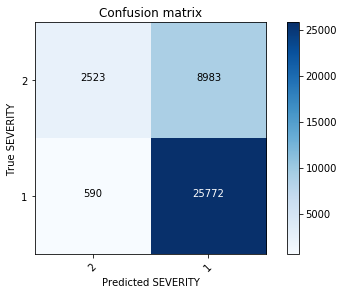

In [68]:
nf_matrix = confusion_matrix(y_test, yhat, labels=[2,1])
np.set_printoptions(precision=2)


# We plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(B, classes=['2','1'],normalize= False,  title='Confusion matrix')
print (classification_report(y_test, yhat))


## In the confusion matrix we see that the value 0.22 is too slow. We need to improve it. The prediction is no very good.

In [69]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob) #Bad precission

0.5445263669406151

In [70]:
#Now we try to make the test again with the "balanced" label on

def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf
 
model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
print(classification_report(y_test, pred_y))


              precision    recall  f1-score   support

           1       0.78      0.80      0.79     26362
           2       0.52      0.49      0.50     11506

    accuracy                           0.71     37868
   macro avg       0.65      0.65      0.65     37868
weighted avg       0.70      0.71      0.70     37868



## Now the results are more acceptable. Let's try another method to see if the results can be improved. 

In [71]:
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
def run_model_nr(X_train, X_test, y_train, y_test):
    undersample_nr = NearMiss(version=2, n_neighbors=20)
    undersample_nr.fit(X_train, y_train)
    return undersample_nr

model_nr = run_model_nr(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           1       0.78      0.80      0.79     26362
           2       0.52      0.49      0.50     11506

    accuracy                           0.71     37868
   macro avg       0.65      0.65      0.65     37868
weighted avg       0.70      0.71      0.70     37868



## And we get the exact same values. This is the most efficent result with this data.